In [1]:
import pandas as pd
from datetime import datetime
import comtradeapicall

# --- список недружественных стран ---
UNFRIENDLY = {
    'Australia', 'Albania', 'Andorra', 'United Kingdom', 'Iceland', 'Canada',
    'New Zealand', 'Norway', 'Rep. of Korea', 'North Macedonia', 'Singapore',
    'USA', 'Ukraine', 'Montenegro', 'Switzerland', 'Japan',
    'Austria', 'Belgium', 'Bulgaria', 'Hungary', 'Germany', 'Greece', 'Denmark',
    'Ireland', 'Spain', 'Italy', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg',
    'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia',
    'Slovenia', 'Finland', 'France', 'Croatia', 'Czechia', 'Sweden', 'Estonia'
}
CHINA = 'China'
print(f'Количество не дружественных стран: {len(UNFRIENDLY)}')


Количество не дружественных стран: 43


In [2]:
def download_by_tnved(cmd_code: str):
    """Загружает данные по указанному коду ТН ВЭД за последние 3 года"""
    now = datetime.now()
    years = [now.year - 1, now.year - 2, now.year - 3]

    df = pd.DataFrame()
    for year in years:
        data = comtradeapicall.previewFinalData(
            typeCode='C', freqCode='A', clCode='HS', period=year,
            reporterCode=None, cmdCode=str(cmd_code), flowCode='X',
            partnerCode='643', format_output='JSON', includeDesc=True,
            partner2Code=None, customsCode=None, motCode=None, maxRecords=50000
        )
        df = pd.concat([df, data], ignore_index=True)
    return df

def mark_friendly(df: pd.DataFrame):
    """Добавляет колонку isFriendly: 1 — дружественная, 0 — недружественная"""
    if 'reporterDesc' in df.columns:
        df['isFriendly'] = df['reporterDesc'].apply(lambda x: 0 if x in UNFRIENDLY else 1)
    return df

In [3]:
# --- пример использования ---
# код 8528 телевизоры 
df = download_by_tnved('8528')
df = mark_friendly(df)
df

C:\Users\koren\AppData\Local\Temp\ipykernel_7160\70305840.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, data], ignore_index=True)


,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate,isFriendly
0,C,A,20240101,2024,52,2024,31,AZE,Azerbaijan,X,...,False,0.0,False,NaN,2.033090e+03,2.033090e+03,0,False,True,1
1,C,A,20240101,2024,52,2024,51,ARM,Armenia,X,...,False,0.0,False,NaN,2.630020e+08,2.630020e+08,0,False,True,1
2,C,A,20240101,2024,52,2024,56,BEL,Belgium,X,...,False,0.0,False,NaN,1.221761e+05,1.221761e+05,0,False,True,0
3,C,A,20240101,2024,52,2024,51,ARM,Armenia,X,...,False,0.0,False,NaN,1.541902e+06,1.541902e+06,0,False,True,1
4,C,A,20240101,2024,52,2024,31,AZE,Azerbaijan,X,...,False,0.0,False,NaN,2.033090e+03,2.033090e+03,0,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,C,A,20220101,2022,52,2022,724,ESP,Spain,X,...,False,0.0,False,NaN,1.447818e+06,1.447818e+06,0,False,True,0
518,C,A,20220101,2022,52,2022,724,ESP,Spain,X,...,False,0.0,False,NaN,3.116807e+05,3.116807e+05,0,False,True,0
519,C,A,20220101,2022,52,2022,724,ESP,Spain,X,...,False,0.0,False,NaN,1.759499e+06,1.759499e+06,0,False,True,0
520,C,A,20220101,2022,52,2022,724,ESP,Spain,X,...,False,0.0,False,NaN,1.447818e+06,1.447818e+06,0,False,True,0


In [4]:
df.columns

Index(['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period',
       'reporterCode', 'reporterISO', 'reporterDesc', 'flowCode', 'flowDesc',
       'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code',
       'partner2ISO', 'partner2Desc', 'classificationCode',
       'classificationSearchCode', 'isOriginalClassification', 'cmdCode',
       'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc',
       'mosCode', 'motCode', 'motDesc', 'qtyUnitCode', 'qtyUnitAbbr', 'qty',
       'isQtyEstimated', 'altQtyUnitCode', 'altQtyUnitAbbr', 'altQty',
       'isAltQtyEstimated', 'netWgt', 'isNetWgtEstimated', 'grossWgt',
       'isGrossWgtEstimated', 'cifvalue', 'fobvalue', 'primaryValue',
       'legacyEstimationFlag', 'isReported', 'isAggregate', 'isFriendly'],
      dtype='object')

In [5]:
col = ['refYear', 'reporterDesc', 'isFriendly', 'primaryValue', 'qty', 'qtyUnitCode', 'netWgt','partnerDesc']
df_proc = df[col].copy()
now = datetime.now()
years = [now.year - 1, now.year - 2, now.year - 3]

df_proc_year_1 = df_proc[df_proc['refYear'] == years[0]].sort_values(by='primaryValue', ascending=False).copy()
df_proc_year_2 = df_proc[df_proc['refYear'] == years[1]].sort_values(by='primaryValue', ascending=False).copy()
df_proc_year_3 = df_proc[df_proc['refYear'] == years[2]].sort_values(by='primaryValue', ascending=False).copy()

In [16]:
import pandas as pd
import numpy as np


def calc_import_metrics(
    df_year: pd.DataFrame,
    *,
    value_col: str = "primaryValue",
    qty_col: str = "qty",
    friendly_col: str = "isFriendly",
    country_col: str = "partnerDesc",
    china_mask_col: str = "partnerISO",  # 'partnerISO' или 'reporterDesc'
    china_value: str = "CHN",            # 'CHN' или 'China'
):
    d = df_year.copy()

    # Приводим типы
    d[value_col] = pd.to_numeric(d[value_col], errors="coerce").fillna(0)
    d[qty_col] = pd.to_numeric(d[qty_col], errors="coerce")

    # Маска Китая
    mask_china = df_year['reporterDesc'].str.contains(CHINA)

    # Маска дружественных
    mask_friend = d[friendly_col] == 1

    # БАЗОВЫЕ МЕТРИКИ
    total_import = d[value_col].sum()
    import_from_is_friend = d.loc[mask_friend, value_col].sum()
    import_from_is_not_friend = d.loc[~mask_friend, value_col].sum()
    import_from_china = d.loc[mask_china, value_col].sum()

    share_unfriendly = float(import_from_is_not_friend / total_import) if total_import else 0.0
    share_china = float(import_from_china / total_import) if total_import else 0.0

    # КОНТРАКТНАЯ ЦЕНА: primaryValue / qty (если qty > 0 и qty != -1)
    valid_qty_mask = d[qty_col].notna() & (d[qty_col] > 0) & (d[qty_col] != -1)

    # Страны, где qty == -1
    countries_no_qty = (
        d.loc[d[qty_col] == -1, country_col]
        .astype(str)
        .dropna()
        .unique()
        .tolist()
        if qty_col in d.columns
        else []
    )

    # Цена для Китая
    val_china = d.loc[mask_china & valid_qty_mask, value_col].sum()
    qty_china = d.loc[mask_china & valid_qty_mask, qty_col].sum()
    price_china = float(val_china / qty_china) if qty_china and qty_china > 0 else float("nan")

    # Цена для прочих
    val_others = d.loc[~mask_china & valid_qty_mask, value_col].sum()
    qty_others = d.loc[~mask_china & valid_qty_mask, qty_col].sum()
    price_others = float(val_others / qty_others) if qty_others and qty_others > 0 else float("nan")

    price_diff_ratio = (
        float(price_china / price_others) if (price_china and price_others) else float("nan")
    )

    # # Вывод результатов
    # print(f"Всего импорт: {total_import}")
    # print(f"ДС импорт: {import_from_is_friend}")
    # print(f"НС импорт: {import_from_is_not_friend}")
    # print(f"Китай импорт: {import_from_china}")
    # print(f"Доля импорта из НС: {share_unfriendly}")
    # print(f"Доля импорта из Китая: {share_china}")

    # Контрактные цены
    if not np.isnan(price_china):
        print(f"Контрактная цена Китая (primaryValue/qty): {price_china}")
    else:
        print("Контрактная цена Китая не рассчитана (нет валидного qty для Китая).")

    if not np.isnan(price_others):
        print(f"Контрактная цена прочих стран (primaryValue/qty): {price_others}")
    else:
        print("Контрактная цена прочих стран не рассчитана (нет валидного qty у прочих стран).")

    if not np.isnan(price_diff_ratio):
        print(f"Отношение цен (Китай / прочие): {price_diff_ratio}")
    else:
        print("Отношение цен не рассчитано.")

    # Уведомление о странах без qty
    if countries_no_qty:
        preview = countries_no_qty[:10]
        more = len(countries_no_qty) - len(preview)
        msg = f"Страны с qty = -1 (исключены из расчёта цены): {', '.join(preview)}"
        if more > 0:
            msg += f" и ещё {more}…"
        print(msg)

    return {
        "import_total": float(total_import),
        "import_friendly": float(import_from_is_friend),
        "import_unfriendly": float(import_from_is_not_friend),
        "import_china": float(import_from_china),
        "share_unfriendly": share_unfriendly,
        "share_china": share_china,
        "price_china": price_china,
        "price_others": price_others,
        "price_diff_ratio": price_diff_ratio,
        "countries_no_qty": countries_no_qty,
        "year" : df_year['refYear'].unique()
    }


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def pie_friendly_unfriendly_with_china(
    df_year: pd.DataFrame,
    *,
    value_col: str = "primaryValue",
    friendly_col: str = "isFriendly",
    partner_iso_col: str = "partnerISO",
    partner_desc_col: str = "partnerDesc",
    china_iso: str = "CHN",
    china_name_token: str = "China",
    title: str | None = None,
):
    d = df_year.copy()

    # приведение типов и защита от NaN
    d[value_col] = pd.to_numeric(d[value_col], errors="coerce").fillna(0)
    if friendly_col not in d.columns:
        raise KeyError(f"Не найдена колонка {friendly_col}")
    # маска Китая — по ISO; если его нет, fallback по названию
    mask_china = df_year['reporterDesc'].str.contains(CHINA)

    mask_friend = d[friendly_col].isin([1, True, "1", "true", "True"])

    # суммы по категориям
    val_china = float(d.loc[mask_china, value_col].sum())
    val_friend_other = float(d.loc[mask_friend & ~mask_china, value_col].sum())
    val_unfriendly = float(d.loc[~mask_friend, value_col].sum())
    total = val_china + val_friend_other + val_unfriendly

    if total <= 0:
        print("Нет данных для визуализации (total == 0). Проверь фильтры по году/потоку.")
        return pd.DataFrame(columns=["segment", "value", "share"])

    # доли
    shares = np.array([val_china, val_friend_other, val_unfriendly]) / total
    labels = ["Китай", "Другие дружественные", "Недружественные"]

    # табличка-резюме (удобно дальше использовать)
    summary = pd.DataFrame({
        "segment": labels,
        "value": [val_china, val_friend_other, val_unfriendly],
        "share": shares
    })

    # заголовок
    if title is None:
        if "refYear" in d.columns and d["refYear"].nunique() == 1:
            year_val = int(d["refYear"].dropna().iloc[0])
            title = f"Структура импорта по стоимости, {year_val}"
        else:
            title = "Структура импорта по стоимости за последние 3 года"

    # круговая диаграмма
    plt.figure(figsize=(6, 6))
    plt.pie(
        summary["value"],
        labels=summary["segment"],
        autopct=lambda p: f"{p:.1f}%",
        startangle=90
    )
    plt.title(title)
    plt.axis("equal")  # круг, не овал
    plt.show()

In [24]:
# df_proc_year_1.head()
calc_import_metrics(df_proc_year_1)

Всего импорт: 1968469536.6829996
ДС импорт: 1893774649.385
НС импорт: 74694887.29800001
Китай импорт: 1222757019.118
Доля импорта из НС: 0.037945665861746476
Доля импорта из Китая: 0.6211714209092745
Контрактная цена Китая (primaryValue/qty): 118.77452360778264
Контрактная цена прочих стран (primaryValue/qty): 354.5013240513897
Отношение цен (Китай / прочие): 0.33504677006668865


{'import_total': 1968469536.6829996,
 'import_friendly': 1893774649.385,
 'import_unfriendly': 74694887.29800001,
 'import_china': 1222757019.118,
 'share_unfriendly': 0.037945665861746476,
 'share_china': 0.6211714209092745,
 'price_china': 118.77452360778264,
 'price_others': 354.5013240513897,
 'price_diff_ratio': 0.33504677006668865,
 'countries_no_qty': [],
 'year': array([2024])}

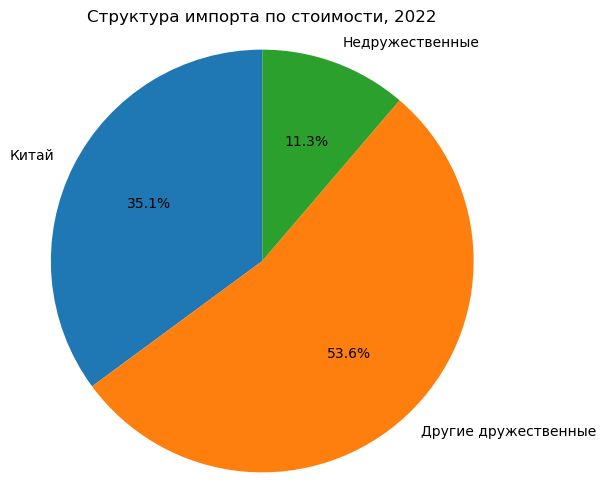

In [25]:
pie_friendly_unfriendly_with_china(df_proc_year_3)

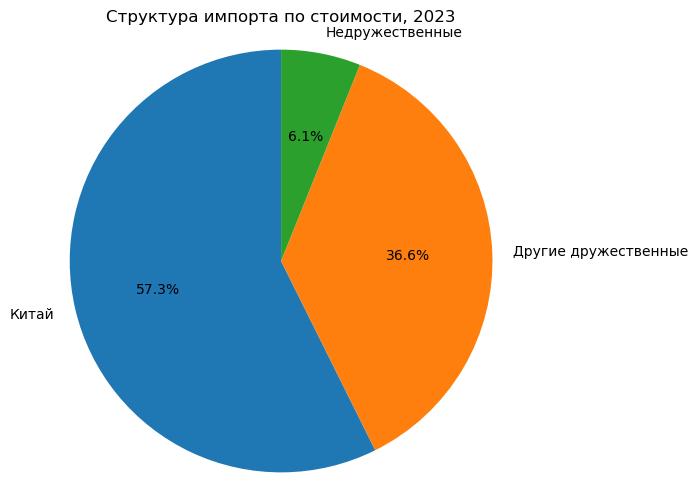

In [26]:
pie_friendly_unfriendly_with_china(df_proc_year_2)

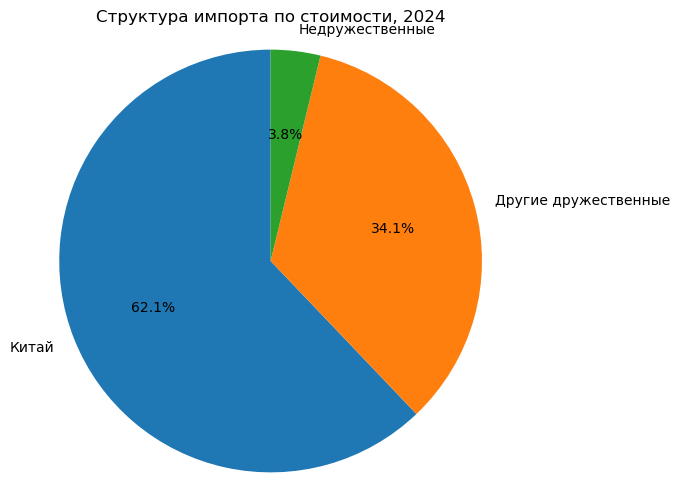

In [27]:
pie_friendly_unfriendly_with_china(df_proc_year_1)

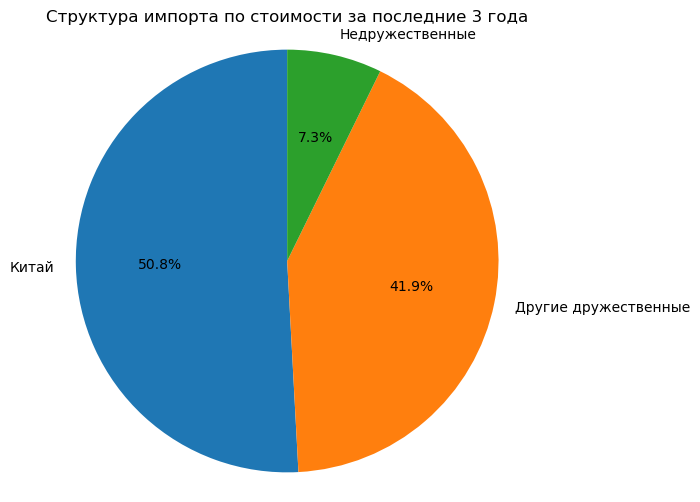

In [28]:
pie_friendly_unfriendly_with_china(df_proc)

In [38]:
import numpy as np
import pandas as pd

records = []

records.append(calc_import_metrics(df_proc_year_1))
records.append(calc_import_metrics(df_proc_year_2))
records.append(calc_import_metrics(df_proc_year_3))
print(records)

Всего импорт: 1968469536.6829996
ДС импорт: 1893774649.385
НС импорт: 74694887.29800001
Китай импорт: 1222757019.118
Доля импорта из НС: 0.037945665861746476
Доля импорта из Китая: 0.6211714209092745
Контрактная цена Китая (primaryValue/qty): 118.77452360778264
Контрактная цена прочих стран (primaryValue/qty): 354.5013240513897
Отношение цен (Китай / прочие): 0.33504677006668865
Всего импорт: 2495994958.5569997
ДС импорт: 2344221076.7660003
НС импорт: 151773881.791
Китай импорт: 1431382432.878
Доля импорта из НС: 0.06080696648471778
Доля импорта из Китая: 0.573471684295997
Контрактная цена Китая (primaryValue/qty): 109.22038721734948
Контрактная цена прочих стран (primaryValue/qty): 345.0178450617201
Отношение цен (Китай / прочие): 0.31656445827551644
Всего импорт: 2438335861.6559997
ДС импорт: 2163891314.983
НС импорт: 274444546.673
Китай импорт: 855929283.319
Доля импорта из НС: 0.11255403777173278
Доля импорта из Китая: 0.3510301008072343
Контрактная цена Китая (primaryValue/qty): 8

In [39]:
import matplotlib.pyplot as plt

def _norm_year(y):
    # год может прийти как int, [2024], np.array([2024]) — приведём к int
    if isinstance(y, (list, tuple, np.ndarray)) and len(y) > 0:
        return int(y[0])
    return int(y)

In [40]:
def _trend(values, years, eps=0.02):
    """Возвращает (delta_abs, delta_pct, cagr, label) для ряда за 3 года."""
    y = np.asarray(values, dtype=float)
    x = np.asarray(years, dtype=float)
    first, last = y[0], y[-1]
    delta_abs = last - first
    delta_pct = (delta_abs / first) if first != 0 else np.nan
    # CAGR на (len-1) интервалов
    n = len(y) - 1
    cagr = (last/first)**(1/n) - 1 if (first > 0 and last > 0) else np.nan
    # простой ярлык
    if np.isnan(delta_pct):
        label = "Стабильный"
    elif delta_pct > eps:
        label = "Положительный"
    elif delta_pct < -eps:
        label = "Отрицательный"
    else:
        label = "Стабильный"
    return float(delta_abs), float(delta_pct) if not np.isnan(delta_pct) else np.nan, \
           float(cagr) if not np.isnan(cagr) else np.nan, label

In [49]:
def summarize_trends(records, plot=False):
    """
    records: список из 3 dict, каждый как в примере пользователя.
    Возвращает:
      - yearly (отсортированный список по году)
      - trends (словарь по метрикам)
      - flags (булевы/текстовые флаги под меры)
    """
    # 1) нормализуем и сортируем по году
    items = []
    for r in records:
        yr = _norm_year(r.get("year"))
        items.append((yr, r))
    items.sort(key=lambda t: t[0])
    years = [t[0] for t in items]
    data  = [t[1] for t in items]
    # 2) соберём нужные ряды
    series = {
        "import_total":     [d["import_total"]     for d in data],
        "share_unfriendly": [d["share_unfriendly"] for d in data],
        "share_china":      [d["share_china"]      for d in data],
        "price_diff_ratio": [d.get("price_diff_ratio", np.nan) for d in data],
    }

    # 3) посчитаем тренды (только для трёх метрик)
    trends = {}
    for key, title, is_percent in [
        ("import_total", "Импорт, всего", False),
        ("share_unfriendly", "Доля НС", True),
        ("share_china", "Доля Китая", True),
    ]:
        da, dp, cagr, label = _trend(series[key], years)
        trends[key] = {
            "title": title,
            "first": series[key][0],
            "last":  series[key][-1],
            "delta_abs": da,
            "delta_pct": dp,
            "cagr": cagr,
            "label": label,
        }
        if plot:
            vals = np.array(series[key], dtype=float)
            years_int = [int(y) for y in years]        # на всякий случай приводим к int
            plt.figure(figsize=(6,4))
            plt.plot(years_int, vals, marker="o")
        
            # КЛЮЧЕВОЕ: фиксируем тики и подписи по целым годам
            plt.xticks(years_int, [str(y) for y in years_int])
        
            plt.title(f"{title} \nтренд: {label}")

            plt.xlabel("Год")
            plt.ylabel(title)
            plt.grid(alpha=0.3)
        
            for x, yv in zip(years_int, vals):
                if np.isnan(yv): 
                    continue
                txt = f"{yv*100:.1f}%" if is_percent else f"{yv:,.0f}".replace(",", " ")
                plt.annotate(txt, (x, yv), textcoords="offset points", xytext=(0,6), ha="center", fontsize=9)
                
            plt.tight_layout()
            plt.show()


    # 4) флаги для мер
    dumping_flag = bool(np.isfinite(series["price_diff_ratio"][-1]) and series["price_diff_ratio"][-1] < 1.0)
    flags = {
        "for_measure_1_2:share_unfriendly_trend": trends["share_unfriendly"]["label"],
        "for_measure_3:share_china_trend": trends["share_china"]["label"],
        "for_measure_3:dumping_flag(price_ratio<1)": dumping_flag,
        "for_measure_5:import_total_trend": trends["import_total"]["label"],
    }

    return {"years": years, "yearly": data, "trends": trends, "flags": flags}

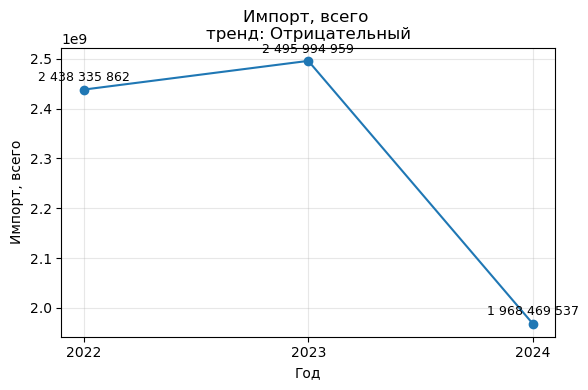

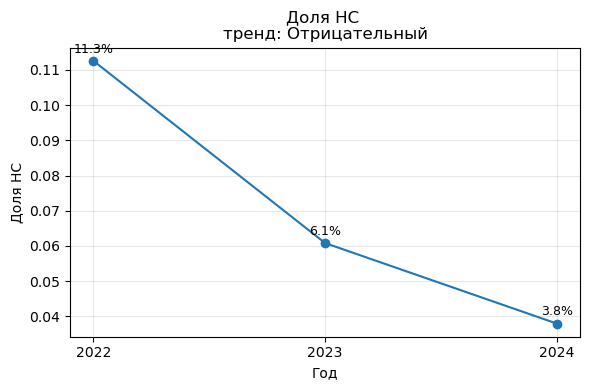

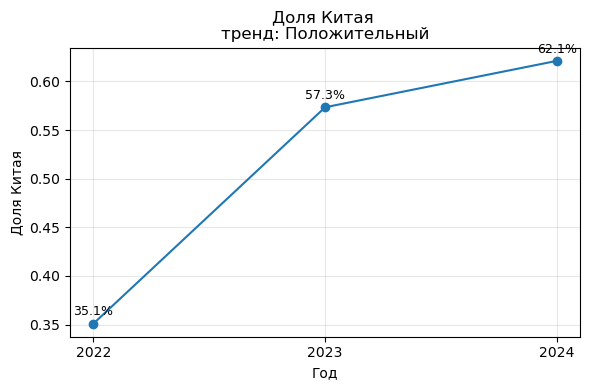

{'import_total': {'title': 'Импорт, всего', 'first': 2438335861.6559997, 'last': 1968469536.6829996, 'delta_abs': -469866324.97300005, 'delta_pct': -0.19269959170181322, 'cagr': -0.1015010248763848, 'label': 'Отрицательный'}, 'share_unfriendly': {'title': 'Доля НС', 'first': 0.11255403777173278, 'last': 0.037945665861746476, 'delta_abs': -0.07460837190998632, 'delta_pct': -0.6628671293098978, 'cagr': -0.41936855864489886, 'label': 'Отрицательный'}, 'share_china': {'title': 'Доля Китая', 'first': 0.3510301008072343, 'last': 0.6211714209092745, 'delta_abs': 0.27014132010204017, 'delta_pct': 0.7695673945932813, 'cagr': 0.33025087656174135, 'label': 'Положительный'}}
{'for_measure_1_2:share_unfriendly_trend': 'Отрицательный', 'for_measure_3:share_china_trend': 'Положительный', 'for_measure_3:dumping_flag(price_ratio<1)': True, 'for_measure_5:import_total_trend': 'Отрицательный'}


In [50]:
res = summarize_trends(records, plot=True)  
print(res["trends"])
print(res["flags"])